## CSE1015 - Lab 5 - KNN Classifier
#### Yajus Kishor
#### 20BAI1318

In [49]:
import pandas as pd

df = pd.read_csv('bank_data.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [52]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [54]:
cols_num = ['campaign', 'pdays',
            'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'age', 'euribor3m']

In [55]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,2,999,0,-1.8,92.893,-46.2,5099.1,30,1.313
1,4,999,0,1.1,93.994,-36.4,5191.0,39,4.855
2,1,999,0,1.4,94.465,-41.8,5228.1,25,4.962
3,3,999,0,1.4,94.465,-41.8,5228.1,38,4.959
4,1,999,0,-0.1,93.200,-42.0,5195.8,47,4.191


In [56]:
cols_cat = ['job', 'marital',
            'education', 'default',
            'housing', 'loan', 'contact', 'month',
            'day_of_week', 'poutcome']

In [57]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [58]:
cols_cat = ['job', 'marital',
            'education', 'default',
            'housing', 'loan', 'contact', 'month',
            'day_of_week', 'poutcome']
cols_new_cat = pd.get_dummies(df[cols_cat], drop_first=False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [59]:
df = pd.concat([df, cols_new_cat], axis=1)

In [60]:
cols_all_cat = list(cols_new_cat.columns)

In [61]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [62]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [63]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [64]:
df_valid_test = df_data.sample(frac=0.30)

In [65]:
df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

In [66]:
df_train_all = df_data.drop(df_valid_test.index)

In [67]:
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

df_train = pd.concat([df_train_pos, df_train_neg.sample(n=len(df_train_pos))], axis=0)

df_train = df_train.sample(n=len(df_train)).reset_index(drop=True)

In [68]:
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n=len(df_valid_pos))], axis=0)

df_valid = df_valid.sample(n=len(df_valid)).reset_index(drop=True)

In [69]:
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

df_test = pd.concat([df_test_pos, df_test_neg.sample(n=len(df_test_pos))], axis=0)

df_test = df_test.sample(n=len(df_test)).reset_index(drop=True)

In [70]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:', X_train_all.shape)
print('Training shapes:', X_train.shape, y_train.shape)
print('Validation shapes:', X_valid.shape, y_valid.shape)

Training All shapes: (2883, 62)
Training shapes: (632, 62) (632,)
Validation shapes: (134, 62) (134,)


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [72]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 51, 2)
k_scores = []
for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train_tf, y_train)
	y_pred = knn.predict(X_valid_tf)
	k_scores.append(accuracy_score(y_valid, y_pred))

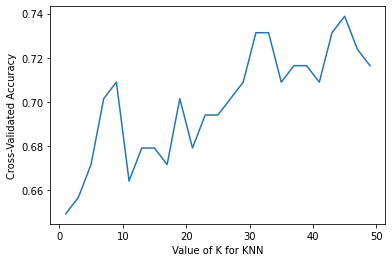

In [122]:
import matplotlib.pyplot as plt

# Plot the accuracy score as a function of k
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [123]:
from sklearn.metrics import confusion_matrix

# Find the number of neighbors corresponding to the best accuracy
best_k = k_scores.index(max(k_scores)) + 1
print('Best K:', best_k)
print('Best Accuracy: %.4f' % k_scores[best_k - 1])

# Create a confusion matrix using the best K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_tf, y_train)
y_pred = knn.predict(X_valid_tf)
confusion_matrix(y_valid, y_pred)

Best K: 23
Best Accuracy: 0.7388


array([[53, 14],
       [27, 40]], dtype=int64)

In [124]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        67
           1       0.74      0.60      0.66        67

    accuracy                           0.69       134
   macro avg       0.70      0.69      0.69       134
weighted avg       0.70      0.69      0.69       134

